In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import Holt, ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
ts = pd.read_csv('https://raw.githubusercontent.com/ml-mipt/ml-mipt-part2/master/2017/seminars/1_ts_esm/data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
ts = ts.sort_index()

**Statsmodels**

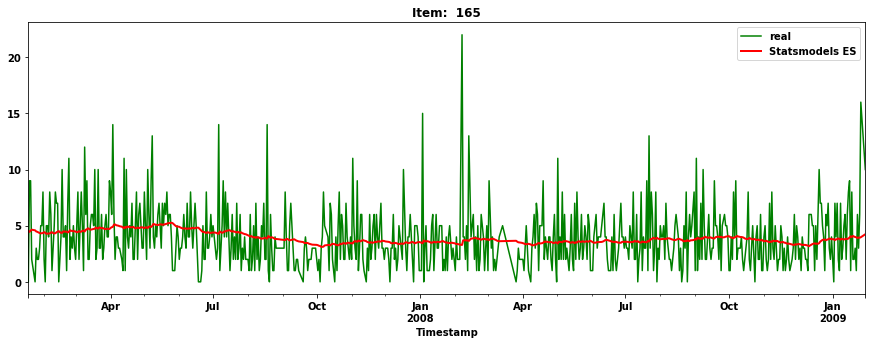

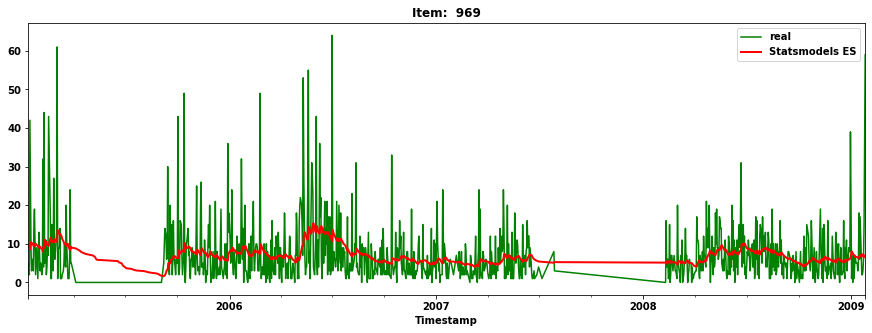

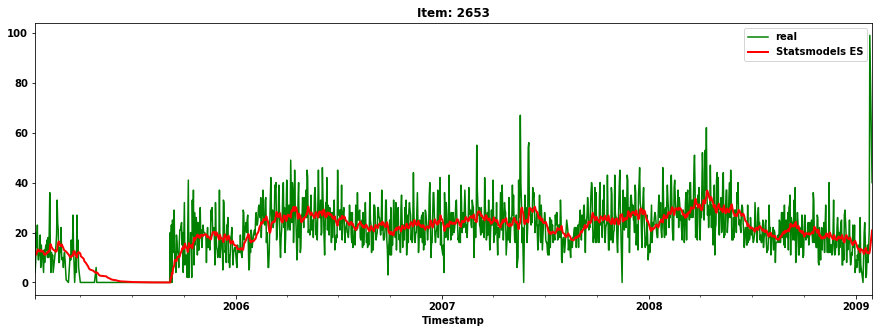

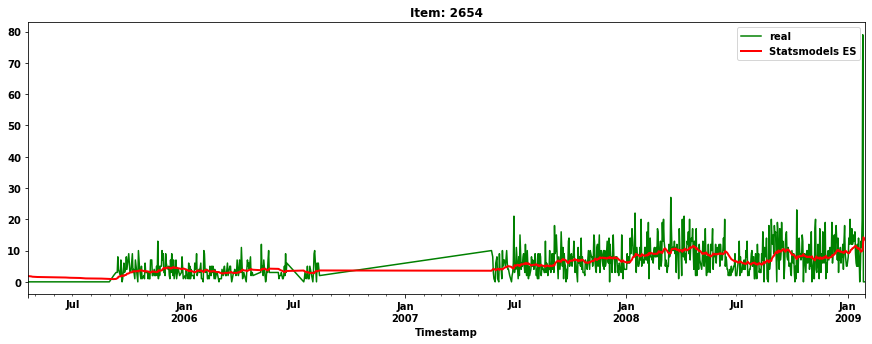

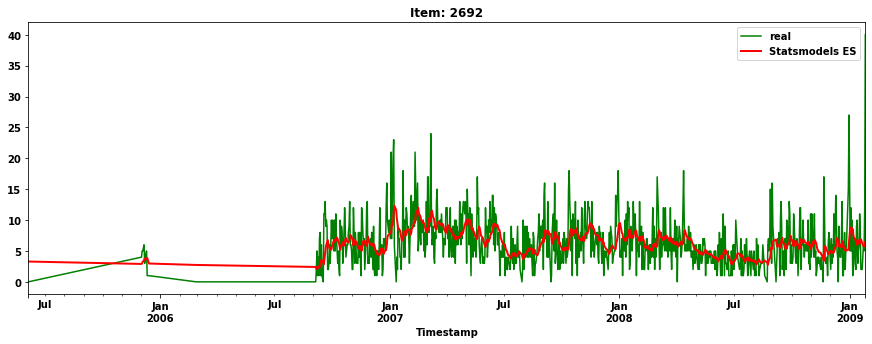

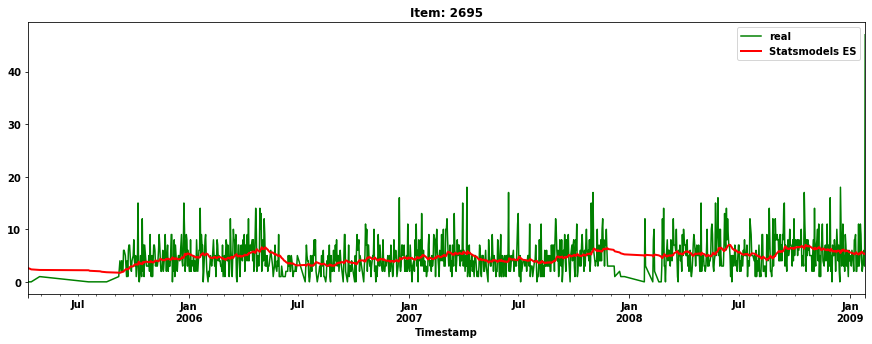

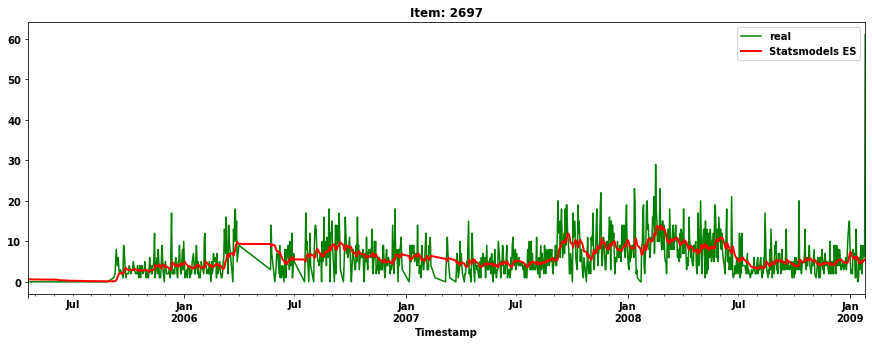

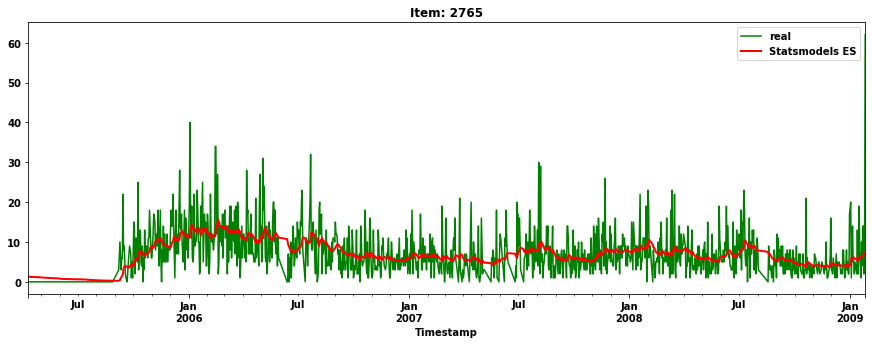

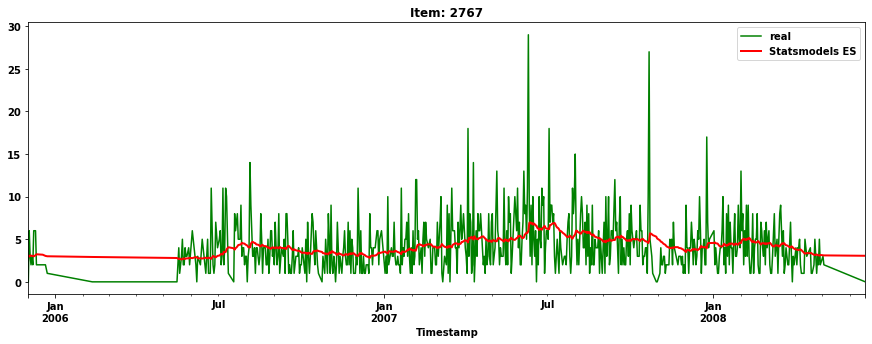

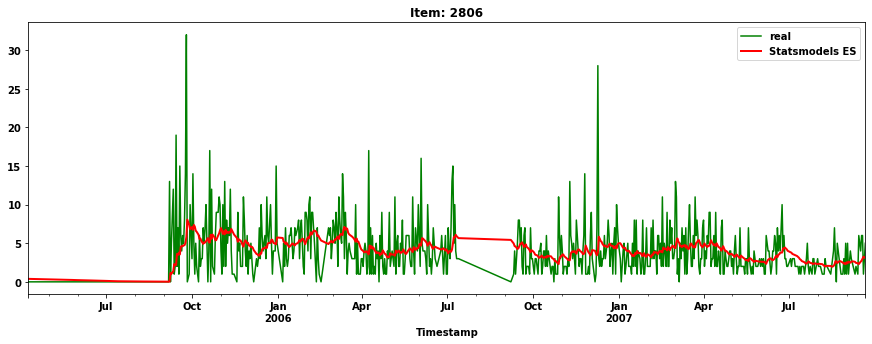

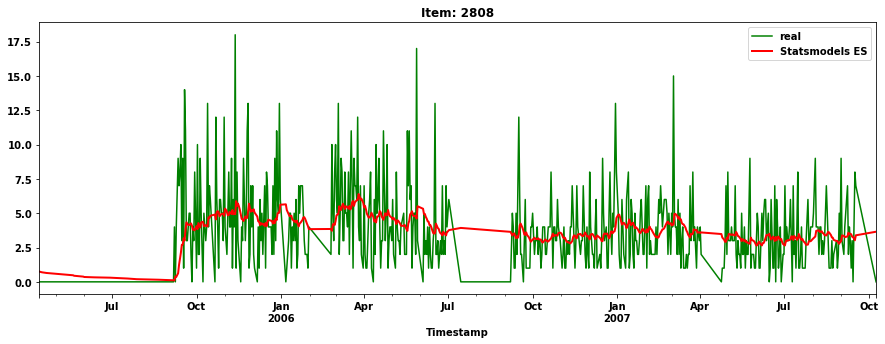

In [3]:
for col in ts.columns:
    df = ts[col].dropna().to_period(freq='D')
    fit = ExponentialSmoothing(df).fit()
    fcast = fit.forecast(30) #поскольку предсказания константные, достаточно и периода=1, но на графике так лучше
        
    plt.figure(figsize=(18,5))
    ax = df.plot(figsize=(15,5), color='green', label='real')
    fit.fittedvalues.plot(ax=ax, style='-', lw=2, color='red', label='Statsmodels ES');
    plt.title(col)
    plt.legend()
    plt.show();

**Pyflux**

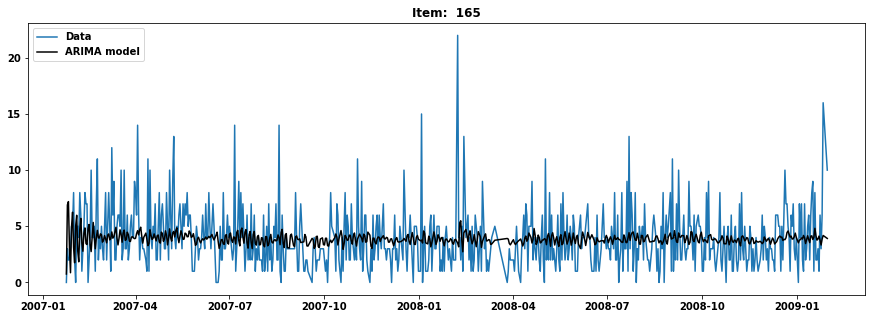

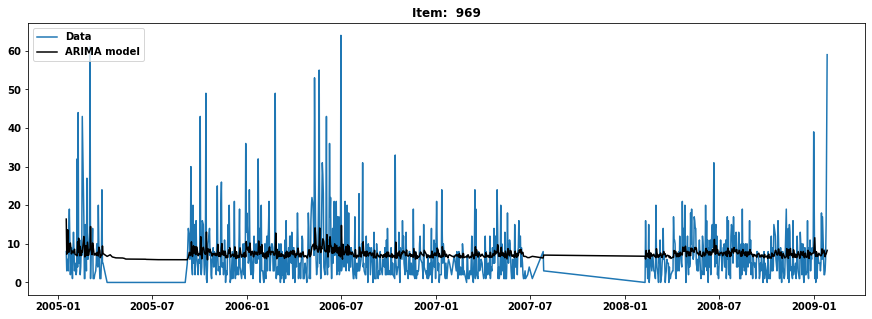

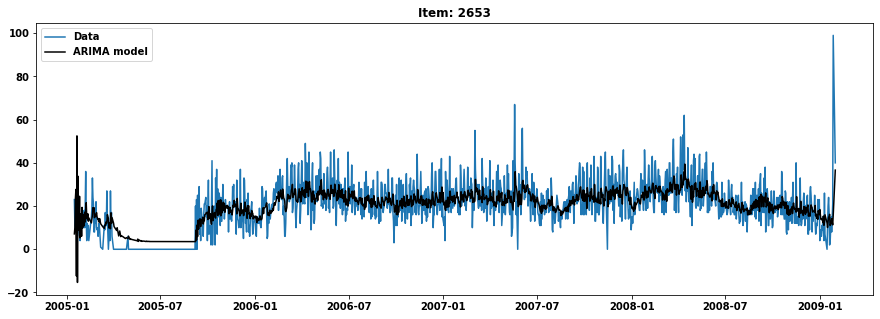

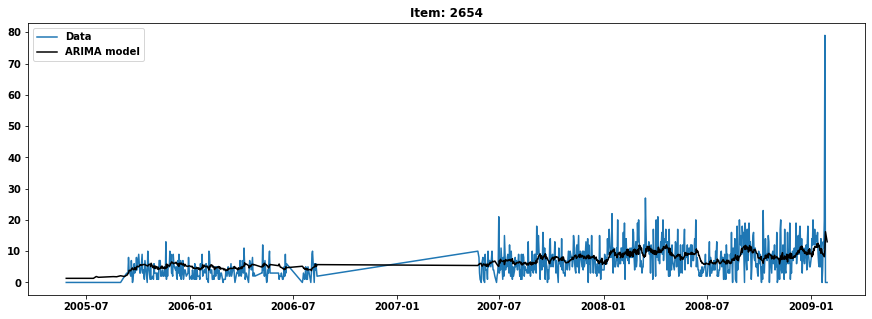

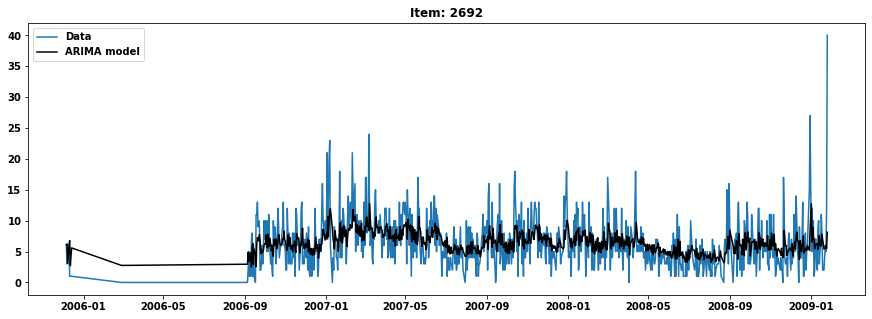

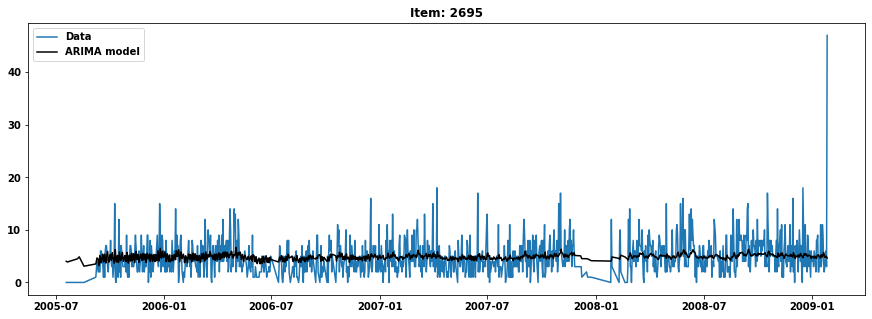

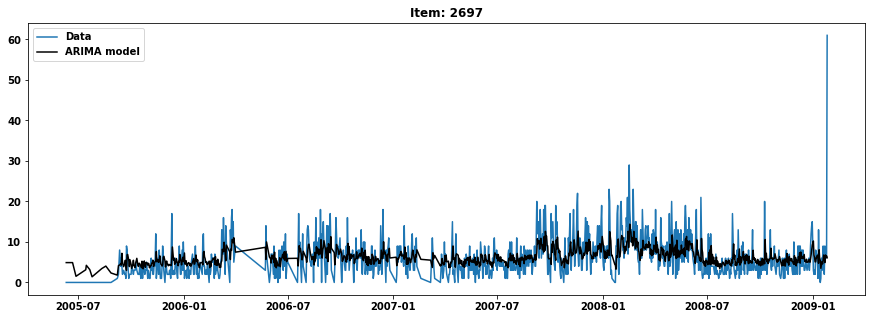

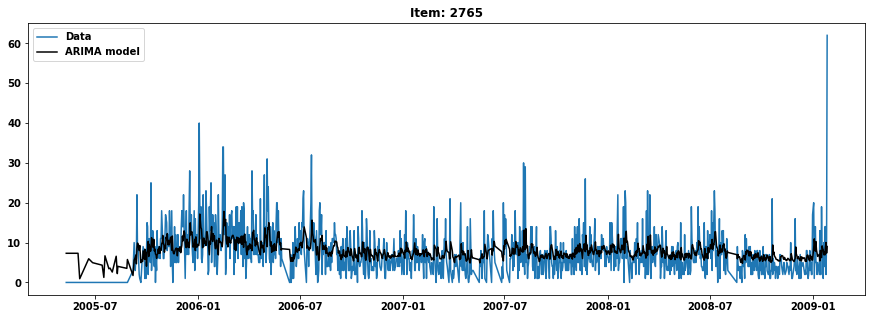

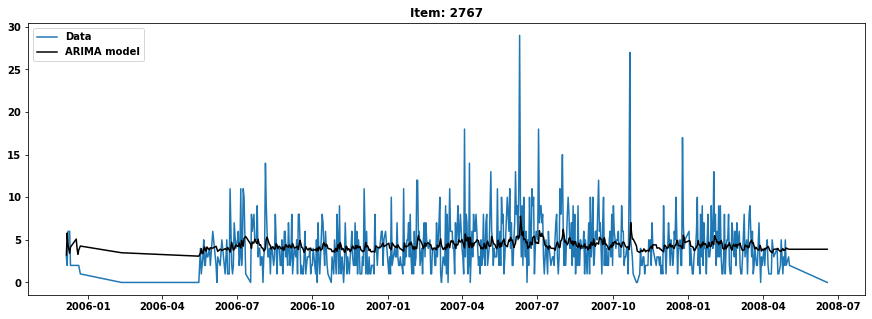

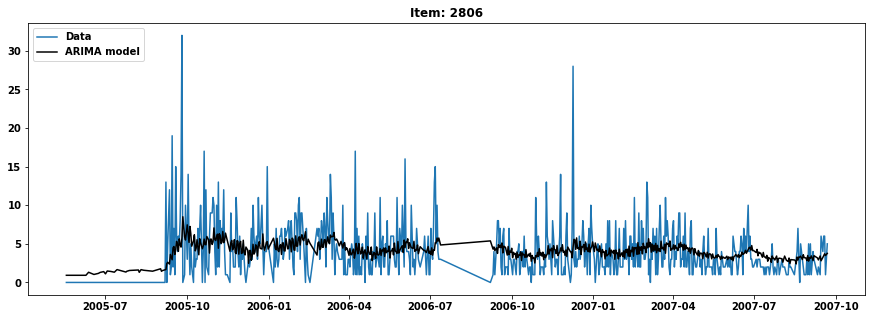

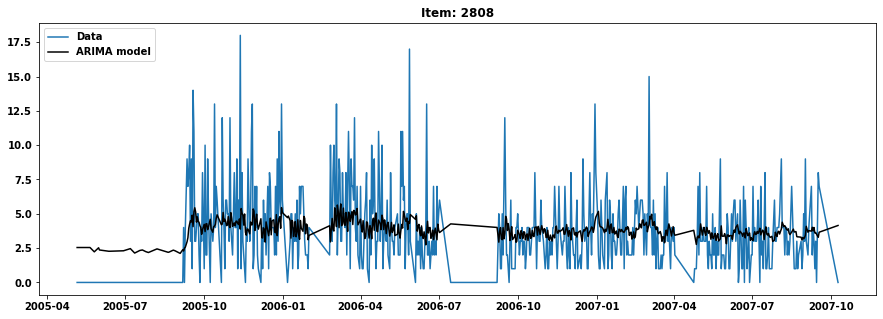

In [5]:
import pyflux as pf
for col in ts.columns:
    model = pf.ARIMA(data=pd.DataFrame(ts[col].dropna()), ar=4, ma=4, family=pf.Normal())
    model.fit(method='MLE')
    model.plot_fit(figsize=(15,5))

**FBprophet**

In [3]:
from fbprophet import Prophet

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


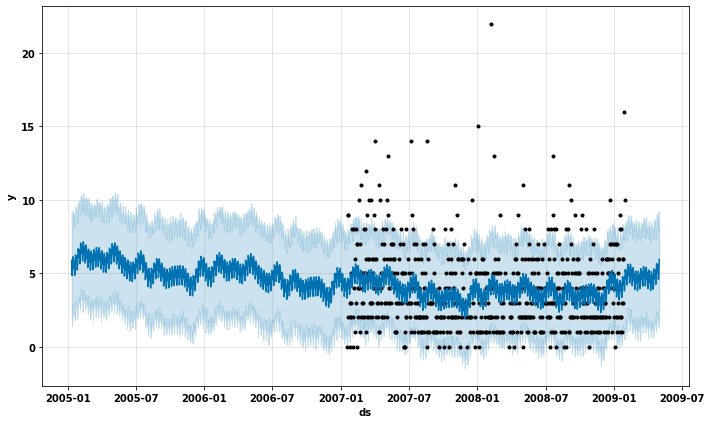

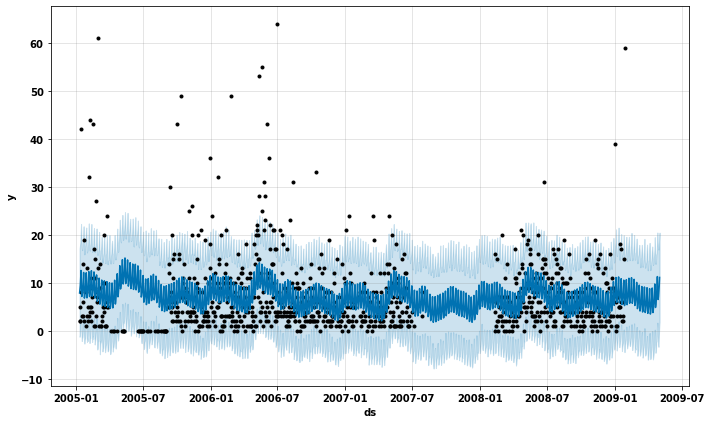

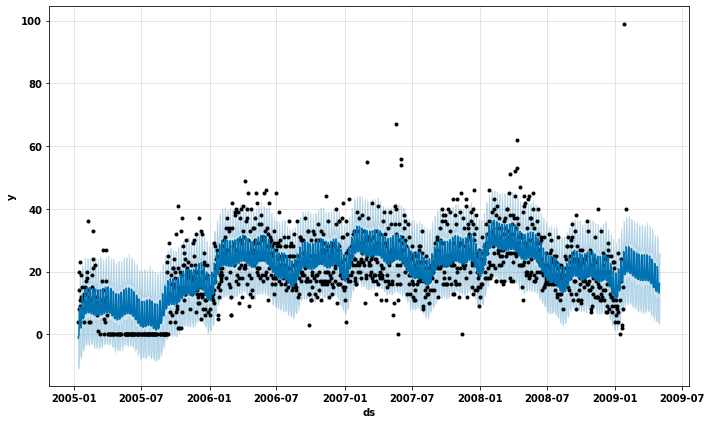

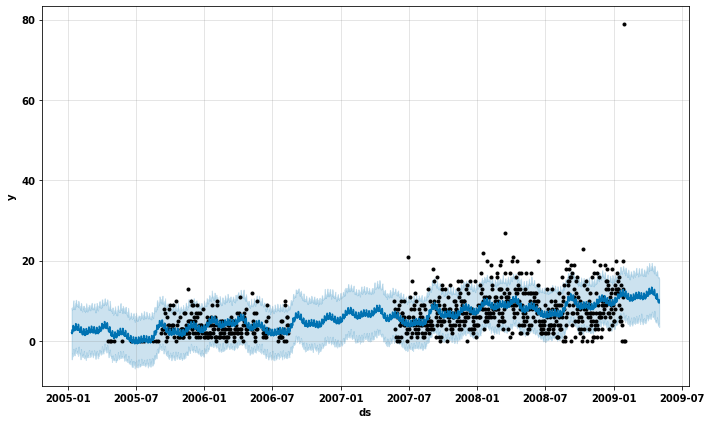

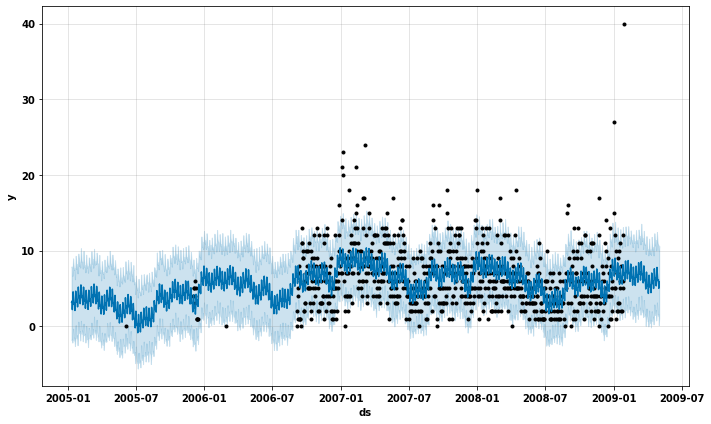

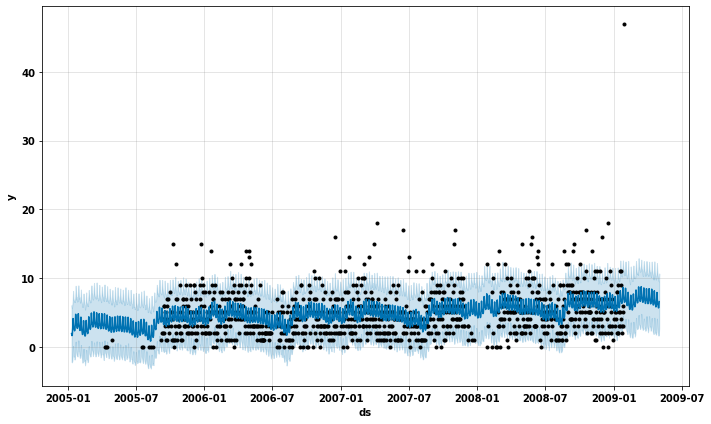

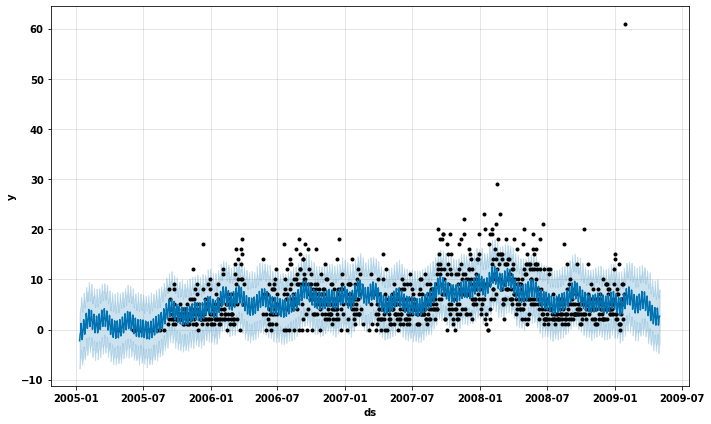

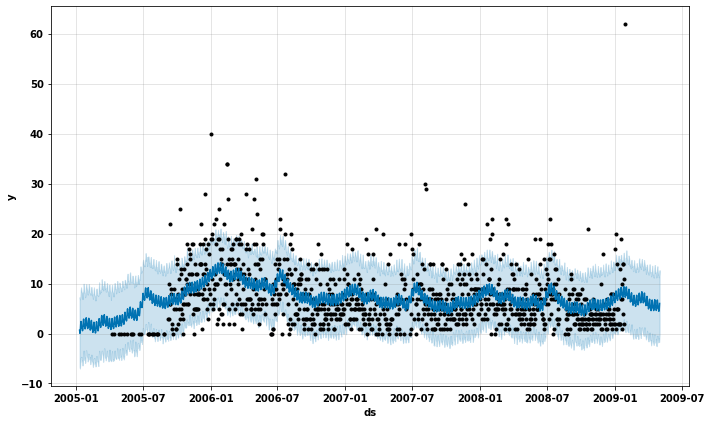

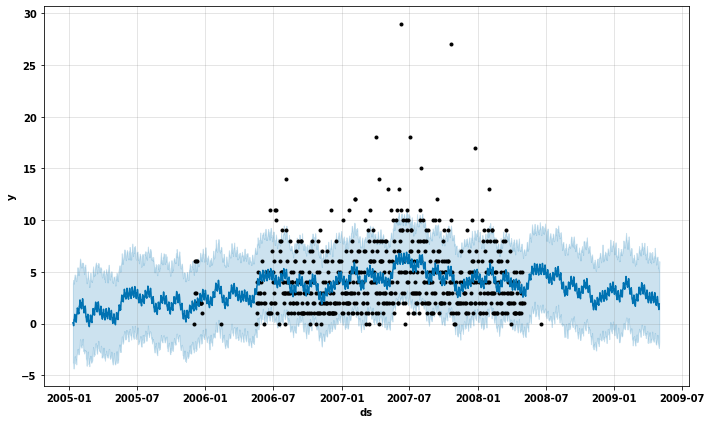

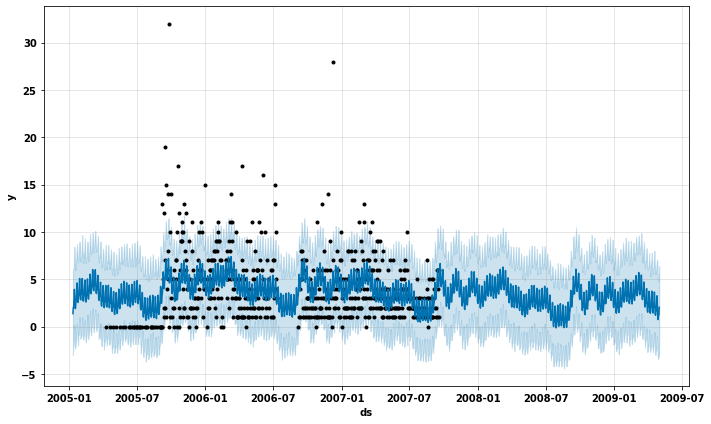

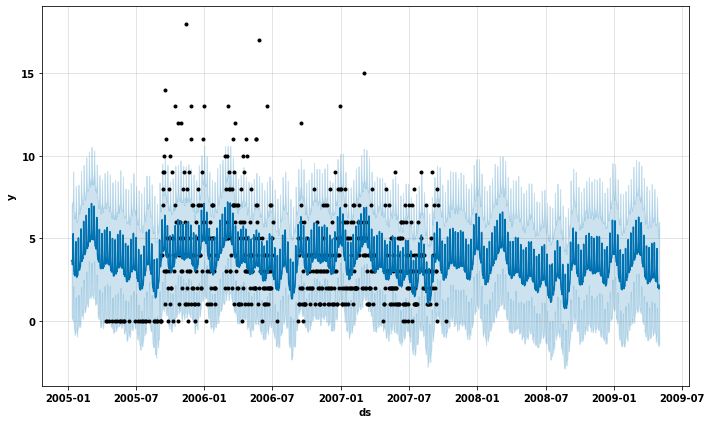

In [4]:
for col in ts.columns:
    df = pd.DataFrame(ts[col])
    df['ds'] = df.index
    df['y'] = df[col]
    df = df.drop([col], axis=1)
    
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    
    m.plot(forecast)